In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First Glance

In [90]:
df = pd.read_csv('song_data.csv')
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [186]:
df['song_popularity'].max()

100

<AxesSubplot:xlabel='song_popularity', ylabel='Count'>

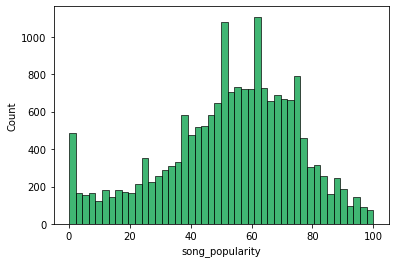

In [188]:
sns.histplot(data=df['song_popularity'],color="#009E44")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [93]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [94]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [95]:
df_cat = df.copy()

In [96]:
df_cat['song_popularity'] = np.where(df_cat['song_popularity'] < 55, "Flop", "Bop")

In [97]:
df_cat['song_popularity'].value_counts()

Bop     9810
Flop    9025
Name: song_popularity, dtype: int64

## Number of keys

In [98]:
print("Number of keys", len(df['key'].unique()))

Number of keys 12


# Distribution of Song Popularity

<AxesSubplot:>

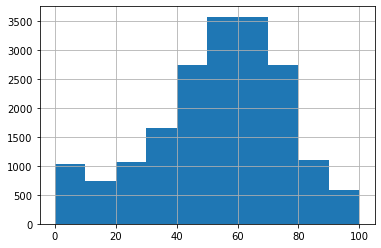

In [99]:
df['song_popularity'].hist()

# Mean Song Popularity by Audio Source

<BarContainer object of 2 artists>

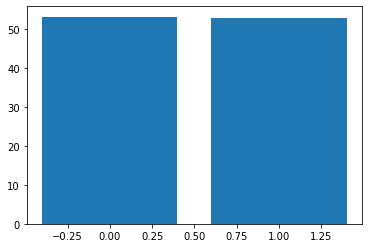

In [102]:
plt.bar(df.groupby('audio_mode')['audio_mode'].count().index, df.groupby('audio_mode')['song_popularity'].mean())

<BarContainer object of 12 artists>

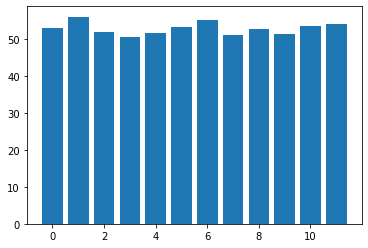

In [103]:
plt.bar(df.groupby('key')['key'].count().index, df.groupby('key')['song_popularity'].mean())

In [104]:
df_cat['duration_mins'] = df_cat['song_duration_ms']/1000

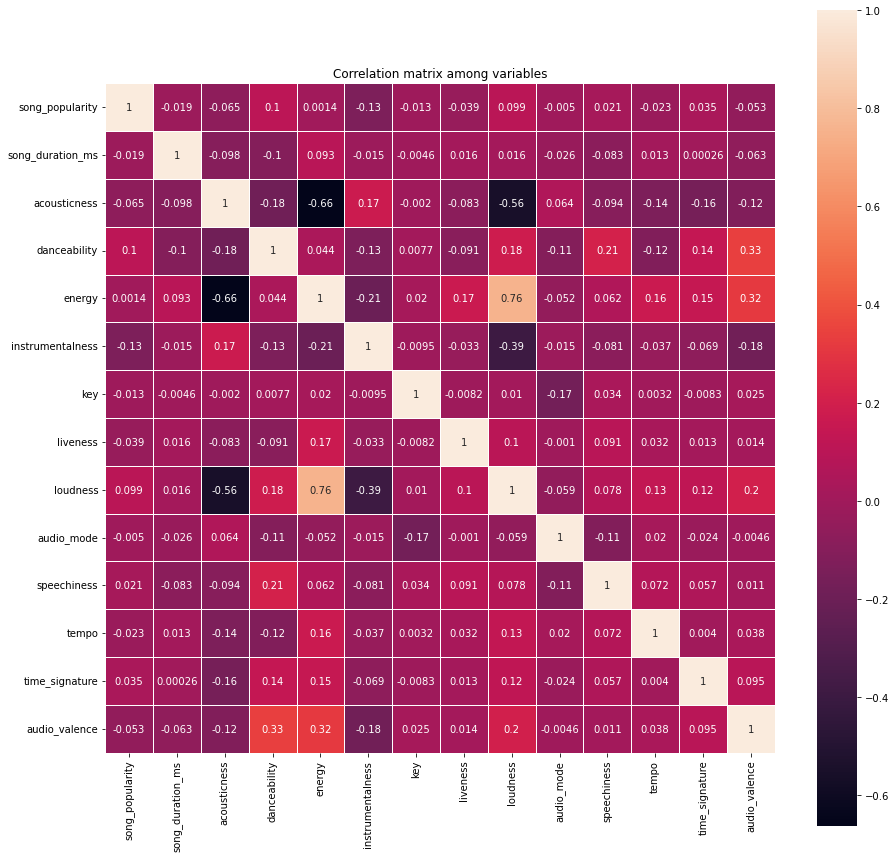

In [108]:
# Using heatmap to observe correlations.
cormat = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among variables")
plt.show()

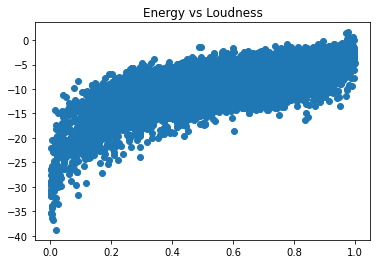

In [109]:
plt.scatter(df["energy"], df["loudness"])
plt.title("Energy vs Loudness")
plt.show()

In [110]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

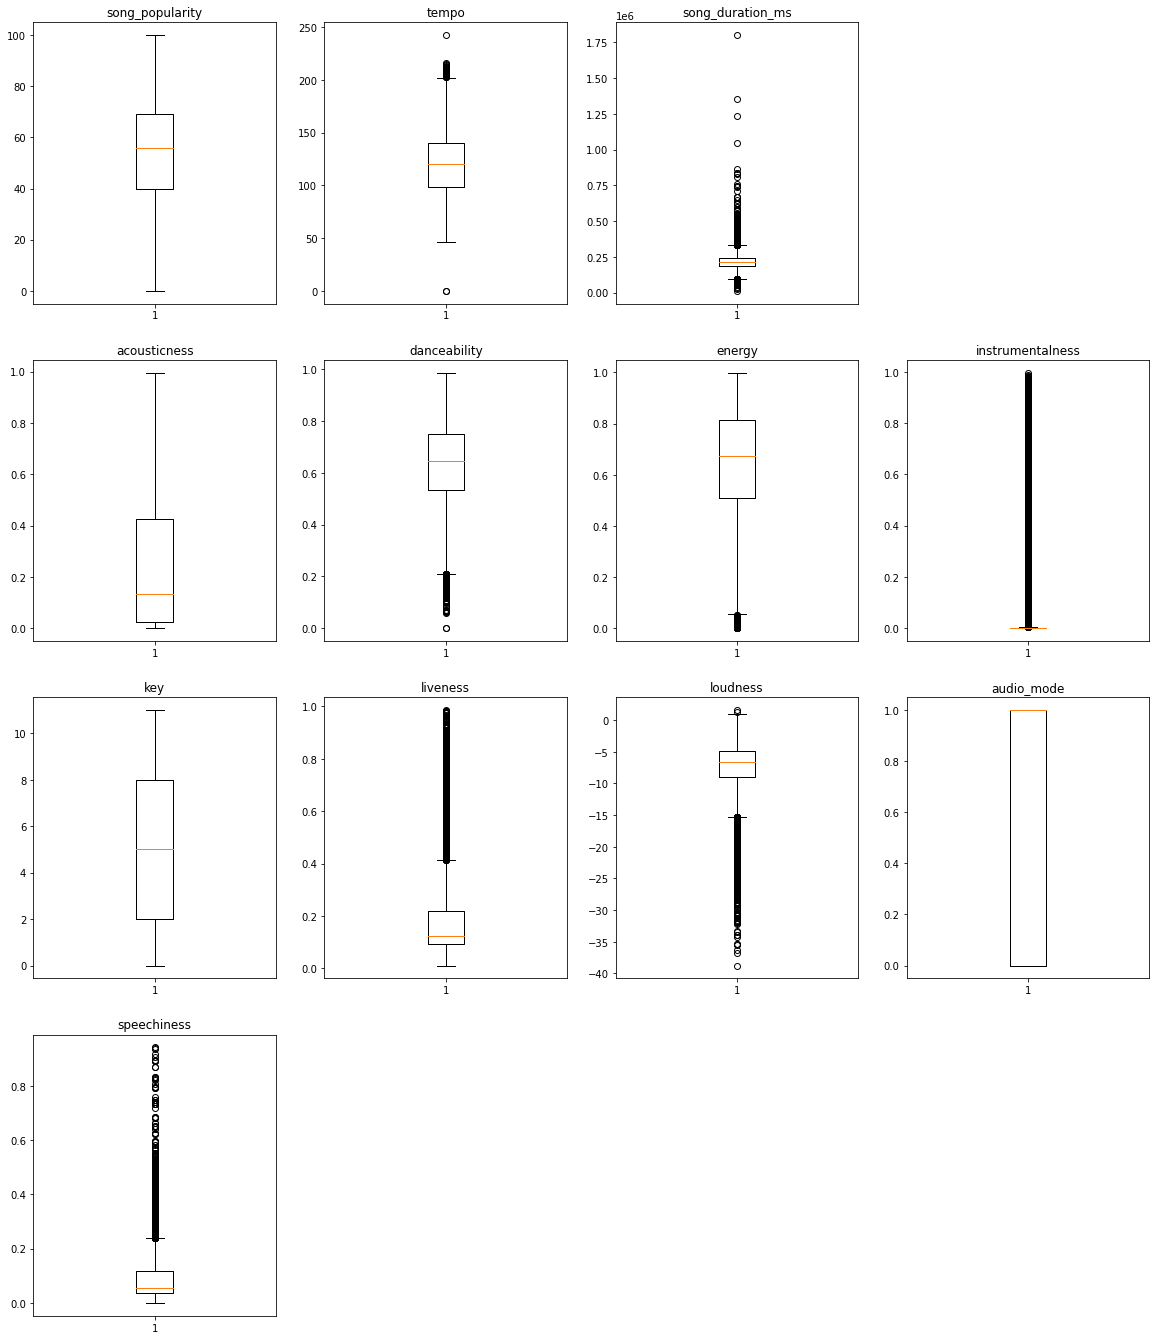

In [113]:
# Create a dictionary of columns.
col_dict = {'song_popularity':1, 'tempo':2,
            'song_duration_ms':3, 'acousticness':4,
            'acousticness':5,'danceability':6,
            'energy':7,'instrumentalness':8,
            'key':9,'liveness':10,
            'loudness':11,'audio_mode':12,
            'speechiness':13}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable])
                     plt.title(variable)

plt.show()

In [114]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [ ]:
#energy and acousticness are a little problematic

In [117]:
import scipy.stats as stats
stats.ttest_ind(df.loc[df['audio_mode']==1,'song_popularity'],df.loc[df['audio_mode']==0,'song_popularity'])

Ttest_indResult(statistic=-0.681968212306905, pvalue=0.4952674378985119)

In [ ]:
there is no significance. no point of this being a feature.

# Scaling

In [118]:
X = df.drop(['song_popularity','song_name'], axis=1)
y = df['song_popularity']

In [191]:
X.columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

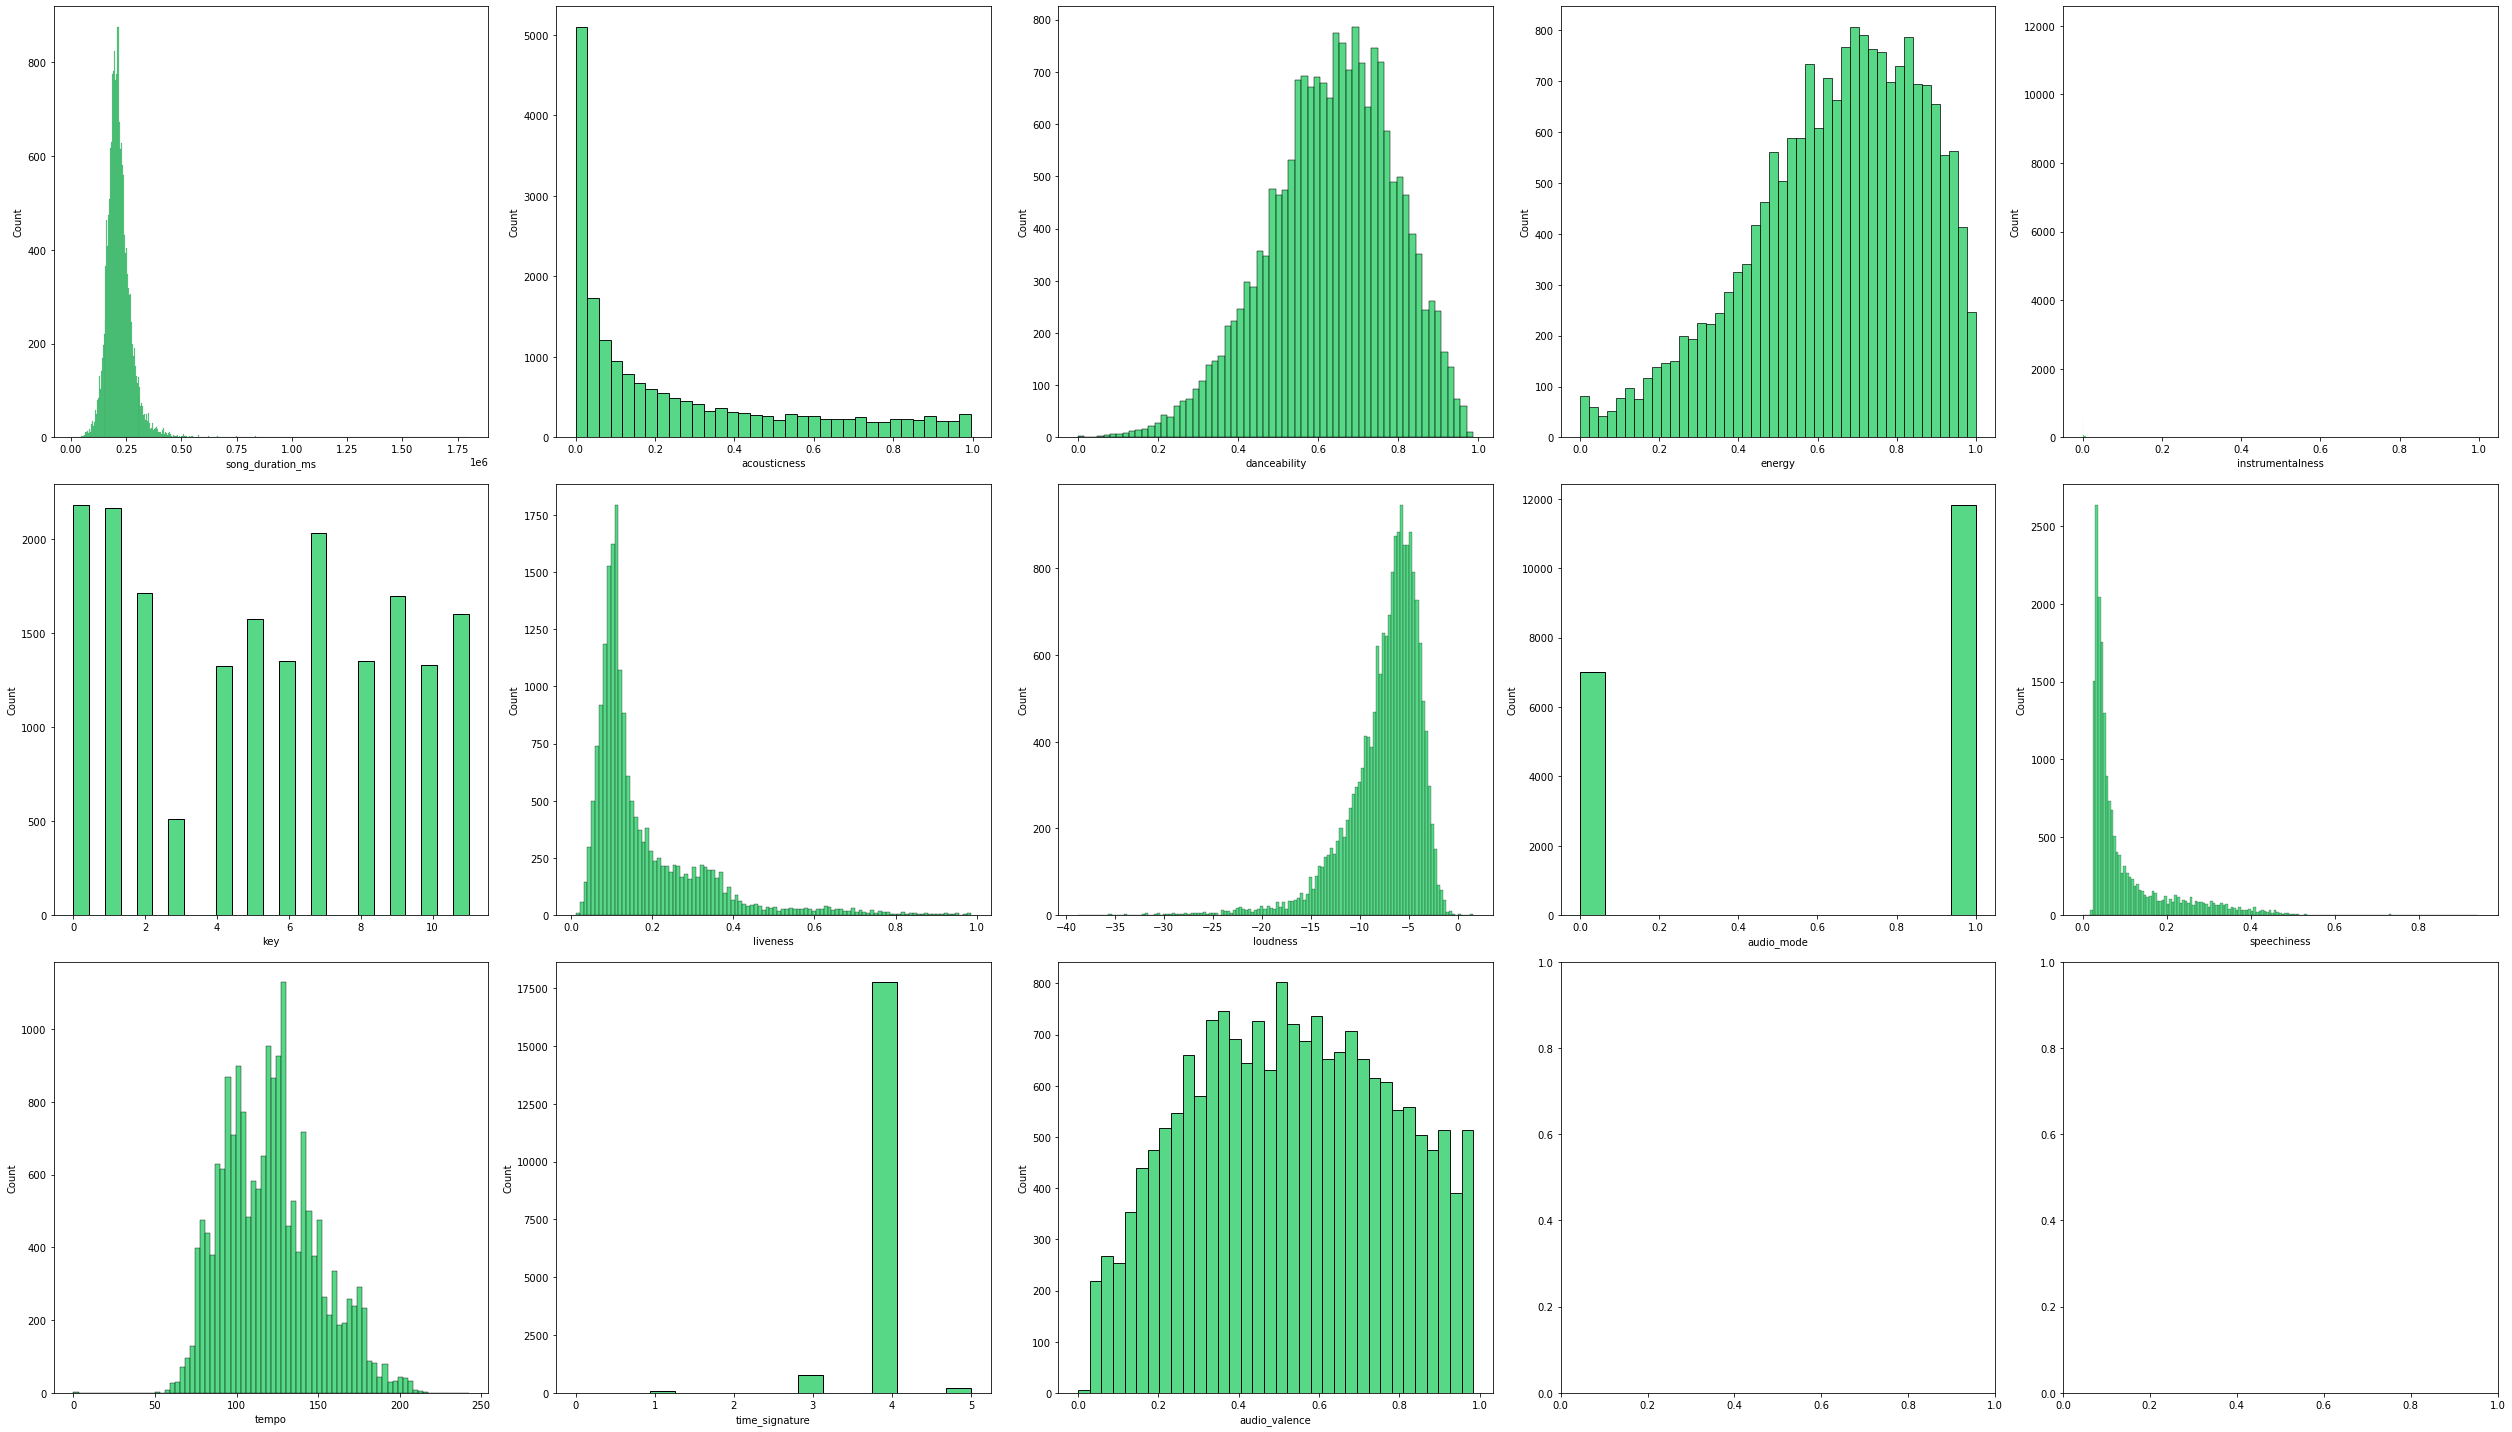

In [196]:
# visualize distribution of unscaled data in each feature
col_names = X.columns
plot_num = 1

plt.subplots(3,5, figsize=(35,20))

for col in col_names:
    plt.subplot(3,5,plot_num)
    sns.histplot(df[col],color = "#1DCB5D")
    plot_num +=1

plt.tight_layout()
plt.show()

In [121]:
from sklearn.model_selection import train_test_split
# Split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify = y, 
                                                    random_state=1)

In [202]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [203]:
# inspecting range of values for each
stats = df.describe()
stats.loc[['min','max','mean']]

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.01090,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.98600,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.17965,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967


In [208]:
stats.loc[['mean']].T

,mean
song_popularity,52.991877
song_duration_ms,218211.587576
acousticness,0.258539
danceability,0.633348
energy,0.644995
instrumentalness,0.078008
key,5.289196
liveness,0.179650
loudness,-7.447435
audio_mode,0.628139


## StandardScaler()

In [123]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [124]:
# instantiate the scaler
scaler = StandardScaler()

In [125]:
# fit the scaler only to the X_train data
scaler = scaler.fit(X_train) #only fit x train data into scalar

In [126]:
# transform both the X_train and X_test data with the fitted scaler
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [128]:
# function to plot histograms

def histogram_all(original, comparison, scaler_type):
    
    plot_num = 1

    plt.subplots(4,2, figsize=(9,15))

    for col in col_names[0:4]:
        plt.subplot(4,2,plot_num)
        sns.histplot(original[col], color='orange', alpha=0.3)
        plt.title('Unscaled')
        
        plt.subplot(4,2,plot_num+1)
        sns.histplot(comparison[col], color='royalblue', alpha=0.5)
        plt.title(scaler_type)
        
        plot_num +=2
        
    plt.tight_layout()
    plt.show()

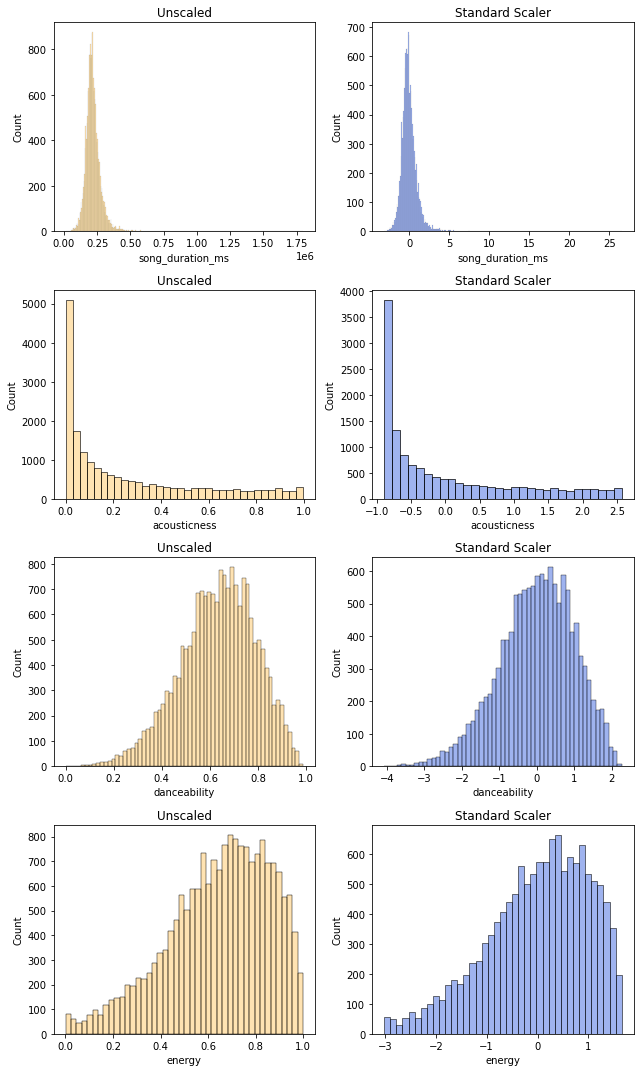

In [130]:
# visualize distributions
col_names = X.columns

X_train_ss_df = pd.DataFrame(X_train_ss, columns=col_names)

histogram_all(df, X_train_ss_df, 'Standard Scaler')
#distributions are pretty much the same!!
#shape of the sta is the same
#relatively normally distributed and right skewed.
#on the right side the units are the same. 

## Minmax Scaler

In [132]:
# instantiate the scaler
scaler = MinMaxScaler()

In [133]:
# fit the scaler to the X_train data
scaler = scaler.fit(X_train)

In [134]:
# transform both the X_train and X_test data with the fitted scaler
X_train_mm = scaler.transform(X_train)
X_test_mm = scaler.transform(X_test)

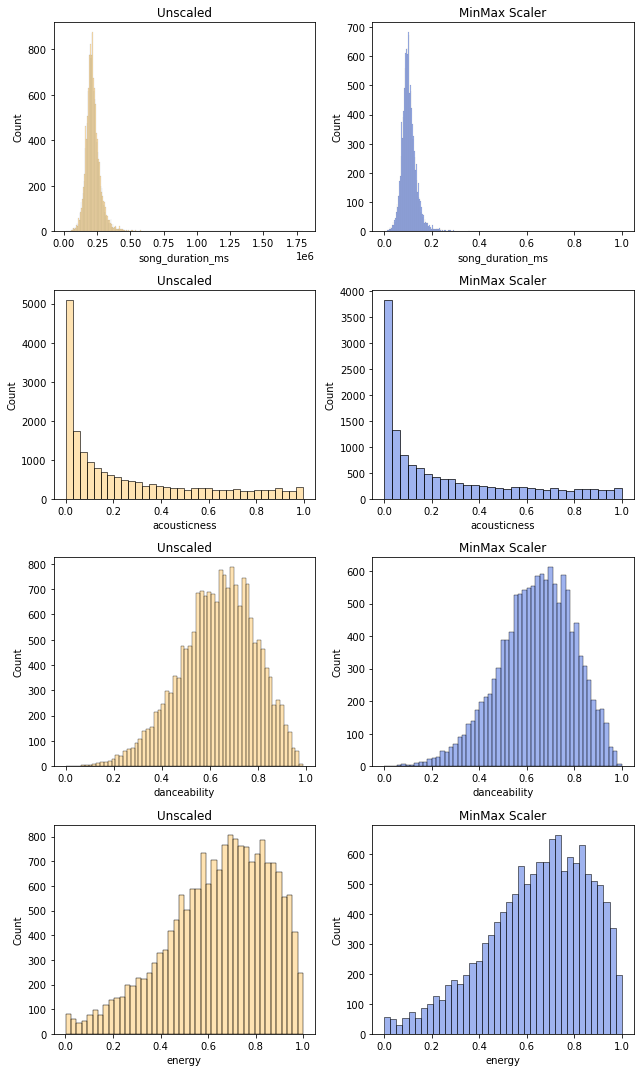

In [137]:
# visualize distributions
col_names = X.columns

X_train_mm_df = pd.DataFrame(X_train_mm, columns=col_names)

histogram_all(df, X_train_mm_df, 'MinMax Scaler')

## Robust Scaler

In [ ]:
scalert = RobustScaler()
scaler = scaler.fit(X_test)


In [138]:
# instantiate the scaler
scaler = RobustScaler()

In [139]:
# fit the scaler to the X_train data
scaler = scaler.fit(X_train)

In [140]:
# transform both the X_train and X_test data with the fitted scaler
X_train_rob = scaler.transform(X_train)
X_test_rob = scaler.transform(X_test)

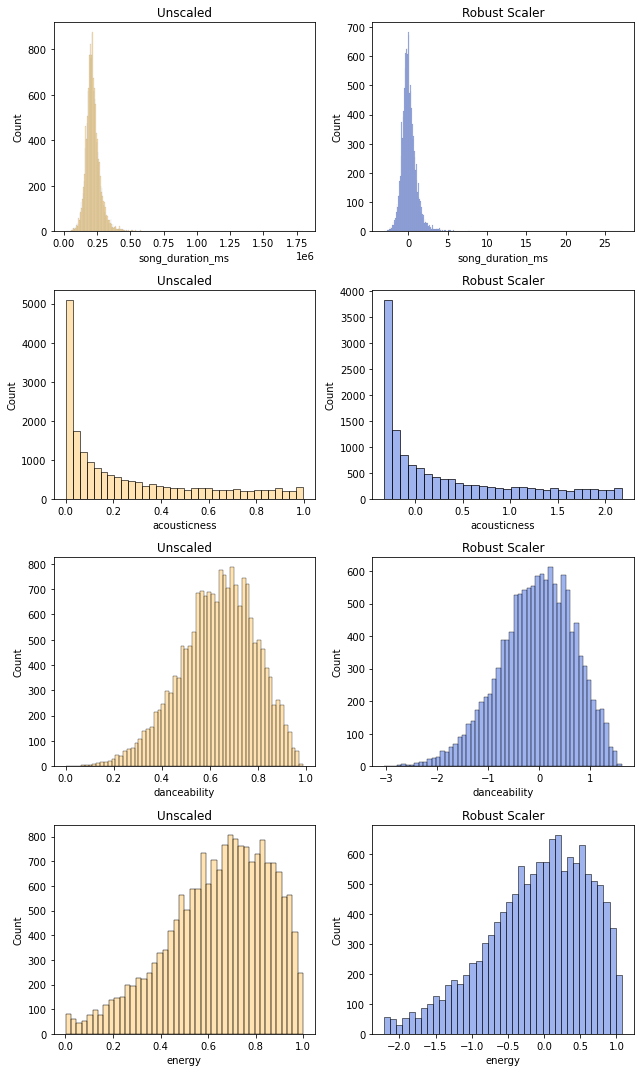

In [142]:
# visualize distributions
col_names = X.columns

X_train_rob_df = pd.DataFrame(X_train_rob, columns=col_names)

histogram_all(df, X_train_rob_df, 'Robust Scaler')
#now it's on this scale of interquartile ranges

In [1]:
xo = np.arange(len(X_train_mm))
plt.scatter(xo,y_train,color='#009E44',alpha = 0.4)

NameError: name 'np' is not defined

In [ ]:
xx = np.arange(len(X_train_mm))
yy1 = X_train_mm[:,0]
yy2 = X_train_ss[:,0]
yy3 = X_train_rob[:,0]
plt.scatter(xx,yy2,color='#FD5F11',alpha = 0.3)

plt.scatter(xx,yy3,color='#1DCB5D', alpha = 0.3)
plt.scatter(xx,yy1,color='#09E7D0',alpha = 0.4)

print(X_train_mm.shape)
print(X_test_ss.shape)

In [2]:
xx = np.arange(len(X_train_mm))
yy1 = X_train_mm[:,0]
yy2 = X_train_ss[:,0]
yy3 = X_train_rob[:,0]
plt.scatter(xx,yy2,color='r',alpha = 0.4)

plt.scatter(xx,yy3,color='b', alpha = 0.4)
plt.scatter(xx,yy1,color='y',alpha = 0.4)

print(X_train_mm.shape)
print(X_test_ss.shape)

NameError: name 'np' is not defined

In [221]:
X_train.shape

(13184, 13)

In [218]:
print(xx)

[    0     1     2 ... 13181 13182 13183]


In [210]:
X_train_mm

array([[0.08925476, 0.0660633 , 0.68693009, ..., 0.41224754, 0.8       ,
        0.65345528],
       [0.14544849, 0.01385441, 0.58865248, ..., 0.38252214, 0.8       ,
        0.3495935 ],
       [0.06043079, 0.72088325, 0.34954407, ..., 0.45350325, 0.2       ,
        0.56199187],
       ...,
       [0.08998893, 0.4949794 , 0.77304965, ..., 0.62698603, 0.8       ,
        0.25406504],
       [0.07824384, 0.81726889, 0.56129686, ..., 0.5929935 , 0.8       ,
        0.91666667],
       [0.12015285, 0.03634439, 0.47416413, ..., 0.5777532 , 0.8       ,
        0.16666667]])

In [212]:
X_train_mm.max()

1.0

In [215]:
xx = np.arange(len(X_train_mm))
yy1 = X_train_mm[:,0]
plt.figure()
plt.scatter(X_train_mm,y_train_mm,color='#5CF684', alpha = 0.4)
plt.xlim(0,1)
plt.show()

NameError: name 'y_train_mm' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
xx = np.arange(len(X_train_mm))
yy1 = X_train_mm[:,0]
plt.scatter(xx,yy1,color='#5CF684', alpha = 0.4)

### Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

LinearRegression()

In [148]:

results = model.fit(X_train_rob,y_train)
model

LinearRegression()

In [151]:
# R2 score
print(model.score(X_train_rob,y_train))
print(model.score(X_test_rob,y_test))

0.04576678979933768
0.04666831344245059


In [147]:
model.score(x_train,y_train)

NameError: name 'x_train' is not defined

## Polynomial Regression

In [153]:
from sklearn.preprocessing import PolynomialFeatures

In [232]:
for i in range(1,20):
    poly_reg = PolynomialFeatures(degree=i) #power is 2
#y = 1 + x + m**1*x**2 + m**2*x**3

    poly_reg.fit(X_train)
    X_train_poly = poly_reg.transform(X_train_mm) #trainsform according to polynomial regression
    X_test_poly = poly_reg.transform(X_test_mm) #
    lr = LinearRegression() #create a linear regression object

    lr.fit(X_train_poly, y_train) #now you can fit your data!
    print(lr.score(X_test_poly, y_test))

C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

0.04666831344245059
0.08637884533028295
0.06361799211900154


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


-16.762513667204217


C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

In [154]:
poly_reg = PolynomialFeatures(degree=2) #power is 2
#y = 1 + x + m**1*x**2 + m**2*x**3

poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train_mm) #trainsform according to polynomial regression
X_test_poly = poly_reg.transform(X_test_mm) #

C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [156]:
lr = LinearRegression() #create a linear regression object

lr.fit(X_train_poly, y_train) #now you can fit your data!

LinearRegression()

In [157]:
lr.score(X_test_poly, y_test,) #score is 95%

0.08637884533028295

In [159]:
y_pred = lr.predict(X_test_poly) #predicted value based on testing data
y_pred

array([42.34012019, 59.38779426, 59.48002572, ..., 52.6054128 ,
       55.38395466, 56.65144464])

In [160]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse

(438.6058522342585, 20.94291890435186)

In [161]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(estimator = model)
visualizer.fit(x, y) 
visualizer.poof()

ModuleNotFoundError: No module named 'yellowbrick'

C:\Users\jsmba\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


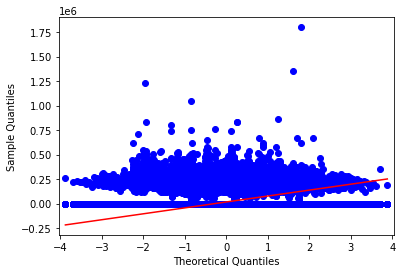

In [162]:
from statsmodels.graphics.gofplots import qqplot

qqplot(X,line='s')
plt.show()

In [ ]:
#not normally distributed

### KNN Regressor

In [173]:
from sklearn.neighbors import KNeighborsRegressor as knn
model4 = knn(n_neighbors=3,p=1,algorithm='brute')
model4.fit(X_train_mm,y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=3, p=1)

In [174]:
ypred3 = model4.predict(X_test_mm)
ypred3

array([51.33333333, 47.33333333, 73.        , ..., 51.66666667,
       36.        , 48.66666667])

In [176]:
model4.score(X_test_mm,y_test)

0.05913205847891723

In [178]:
k_values = np.arange(1,30,2)

In [182]:
train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model2 = knn(n_neighbors=k,p=1)
    model2.fit(X_train_mm,y_train)
    
    train_score = model2.score(X_train_mm, y_train) 
    train_score_arr.append(train_score*100)
    
    val_score = model2.score(X_test_mm, y_test)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=97.48%, test_accuracy=-16.11%
k=3, train_accuracy=54.48%, test_accuracy=5.97%
k=5, train_accuracy=40.06%, test_accuracy=8.67%
k=7, train_accuracy=32.22%, test_accuracy=8.81%
k=9, train_accuracy=27.48%, test_accuracy=9.28%
k=11, train_accuracy=24.12%, test_accuracy=9.18%
k=13, train_accuracy=21.39%, test_accuracy=8.77%
k=15, train_accuracy=19.33%, test_accuracy=8.67%
k=17, train_accuracy=17.74%, test_accuracy=8.60%
k=19, train_accuracy=16.35%, test_accuracy=7.97%
k=21, train_accuracy=15.81%, test_accuracy=7.96%
k=23, train_accuracy=15.11%, test_accuracy=7.80%
k=25, train_accuracy=14.50%, test_accuracy=7.55%
k=27, train_accuracy=13.96%, test_accuracy=7.53%
k=29, train_accuracy=13.64%, test_accuracy=7.68%


In [234]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [236]:
model5 = RFR()
model5.fit(X_train_mm,y_train)

RandomForestRegressor()

In [237]:
model5.score(X_test_mm,y_test)

0.38484548686491027